<h1>K-Fold Cross Validation</h1>
> Nutzung von Train- und Testsets

Hier werden drei grundlegenden Methoden für das Validieren von Modellen erläutert. 

Hier werden drei grundlegenden Methoden für das Validieren von Modellen erläutert. <br>
Die untere Abbildung (Abb1) zeigt einen Überblick der drei Möglichkeiten, Train- und Testsets zu nutzen. 


<i>Abb1</i>: Nutze ganzes Dataset oder teile es auf.<i>

<img src="./files_data/img/cv_notebook_1.PNG"  width=650 hight=450>

Bei der ersten Option werden 100% der Daten für das Training und Testen verwendet, es gibt keine Aufteilung. <br>
Der Nachteil ist, dass das Model beim Testen die gleichen Daten bekommen hat, die auch für das Training genutzt wurden. So kann das Model nicht darauf getestet werden, wie es sich bei Daten verhält, die es noch nie gesehen hat.

Die zweite Option bietet viel bessere Möglichkeiten das Model zu testen, da ein Teil der Daten, die nicht für das Training genutzt wurden, hier verwendet werden. Damit kann besser festgestellt werden, wie das trainierte Model auf ähnliche Eingaben reagiert und ob es gute Prediction liefert. Die Problematik, die sich hier ergibt, ist, dass wenn das Train- und Testset sehr unterschiedliche Daten enthalten. Zum Beispiel, wenn das Trainset nur 10% groß ist, kann das Model sich nicht gut auf die anderen Daten, die im Testset sind, vorbereiten. <br>
Eine Analogie dazu wäre: das Trainset enthält Aufgaben über Mathe 1 Themen. Das Testset hat jedoch nur Mathe 2 Themen. Am Ende performt das Model beim Testen schlecht, das es diese Aufgaben noch nie gesehen hat => Das Testset sollte beide Themen abdecken.


<i>Abb2</i>: Erstelle K-Folds und nutze nach jeder Iteration ein anderen Fold für das Training und Testen. 

<img src="./files_data/img/cv_notebook_2.PNG"  width=450 hight=550>

Bei der dritten Option handelt es sich um K-Folds. Das Dataset wird in K-Folds unterteilt. Nach jeder Iteration wird ein andere Fold für das Testen benutzt, die restlichen Folds werden für das eigentliche Training verwendet. Damit erreicht man eine sehr gute Abdeckung der Daten.

Nach jeder Iteration wird der Score gemessen und am Ende wird der Schnitt berechnet.

Für den Einsatz der dritten Option verwenden wir ein Sklearn Dataset, wo es darum geht handgeschriebene Zahlen in einer 8x8 Matrix zu klassifizieren.

Als Erstes wird das gängige Verfahren mit Train- und Testset verwendet.

In [64]:
# Imports
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.decomposition   import PCA     

In [2]:
digit_data = load_digits()
digit_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
dir(digit_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [46]:
# Erstelle Dataframe mit Pixelpositionen 
dataset_df = pd.DataFrame(digit_data.data, columns=digit_data.feature_names)
dataset_df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [47]:
# Füge dem Dataframe target hinzu.
dataset_df = pd.concat([dataset_df, pd.DataFrame(digit_data.target, columns=['number'])], axis="columns")
dataset_df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


<Figure size 640x480 with 0 Axes>

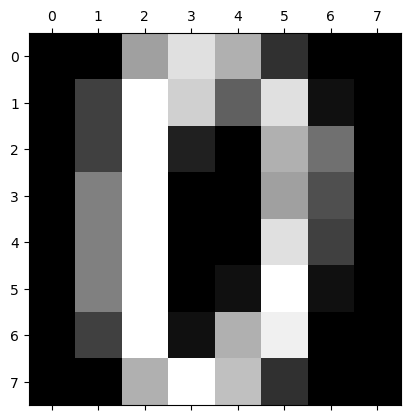

In [48]:
# Zeige eine Zahl.
plt.gray()
plt.matshow( np.array(dataset_df.drop(['number'], axis="columns"))[30].reshape(8, 8),  )

Jetzt kann das Dataset in ein Train- und Testset umgeformt werden.

In [49]:
pca = PCA(0.93) # Optional
X_train, X_test, y_train, y_test = \
                   train_test_split( \
                  pca.fit_transform(dataset_df.drop(['number'],  axis="columns")), dataset_df['number'], test_size=0.2)

In [50]:
X_train.shape

(1437, 25)

Dann wird der Klassifizierer trainiert. Jedes Mal, wenn die Sets erstellt werden, ändert sich der Score, weil die Zuweisung der Daten zu den Sets nicht gleich ist.

In [52]:
# Der Score ändert sich, wenn die Sets neu erstellt werden. 
model = LogisticRegression(max_iter=1200)  # max_iter = 1000
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9611111111111111

Die Anwendung von K-Fold ist mit Sklearn einfach zu verwenden.

Man kann sich die Folds mit dem Code gut veranschaulichen lassen. 

In [76]:
kfold = KFold(n_splits=2)  # 2 Splits
kfold

KFold(n_splits=2, random_state=None, shuffle=False)

Das Dataset enthählt n-Zahlen.

In [77]:
train_data = np.array(range(10))
train_data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
for train, test in kfold.split(train_data):
    print(train, test)  # Index 

[5 6 7 8 9] [0 1 2 3 4]
[0 1 2 3 4] [5 6 7 8 9]


Man kann deutlich sehen, dass die erste Hälfte für das Training genutzt wird, in der nächsten Iteration die zweite Hälfte.

In einer Schleife können dann die Splits für das Training und Testen genutzt werden, wo auch der Score und der Durchschnitt der Scors ermittelt wird.

Ein Problem das auftauchen könnte, ist das bei drei Folds zwei Folds für das Training benutzt werden, aber der dritte Fold sich sehr von den anderen zwei Folds unterscheidet, was ein ähnliches Problem ist, wenn man das Dataset in ein Train- und Testset aufteilt. Dabei das Testset sich sehr vom Trainingset unterscheidet.

Für dieses Problem gibt es von Sklearn "StratifiedKFold" was die Problematik behandelt. <br>
Von Sklearn beschrieben "Generate test sets such that all contain the same distribution of classes, or as close as possible."

In [91]:
s_kfold = StratifiedKFold(n_splits=2)  
s_kfold

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)

In [92]:
train_data = np.array(range(10))
train_data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [94]:
# 10 Daten, 2 Klassen 
# - Aufteilung => Klassen möglichst gleichmäßig verteilen. 
for train, test in s_kfold.split(train_data, ['a', 'b','a', 'b','a', 'b','a', 'b','a', 'b' ]):
    print(train, test)  # Index 

[5 6 7 8 9] [0 1 2 3 4]
[0 1 2 3 4] [5 6 7 8 9]


In der Anwendung bietet Sklearn eine API, um K-Folds ohne viel Code zu nutzen. 

In [103]:
# Geht Folds durch und gibt Durschnitt der Scors zurück.
from sklearn.model_selection import cross_val_score

In [106]:
# Statt X_train kann auch direkt das Dataset genommen werden. 
# - Parameter cv: Cross Validation, n-Folds die n-Scors liefern. 
cross_val_score(LogisticRegression(max_iter=1200), X_train, y_train, cv=3)

array([0.94154489, 0.93110647, 0.94989562])

"cross_val_score" kann auch verschiedene Metriken nutzen. 

Dann gibt es noch "cross_validate" was sich etwas unterscheidet. Hier können mehrere Metriken angegeben werden, zudem werden weitere Informationen ausgegeben.



In [107]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

In [109]:
cross_validate(LogisticRegression(max_iter=1200), X_train, y_train, cv=3)

{'fit_time': array([0.30499744, 0.17300081, 0.15299964]),
 'score_time': array([0.00100017, 0.        , 0.00100017]),
 'test_score': array([0.94154489, 0.93110647, 0.94989562])}

In [110]:
# Liefert Prediction des Testsets
cross_val_predict(LogisticRegression(max_iter=1200), X_train, y_train, cv=3)

array([9, 6, 1, ..., 4, 6, 0])

Cross Validation kann zusammen mit Grid Search angewendet werden, um die Parameter zu Tunen, um den besten Score zu erreichen.